# **Cell Details**

---



*   **Cell:** Sony Murata, 18650 VTC-6 cell

    - Brand: SONY
    - Battery Capacity: 3000 mAh
    - Nominal Capacity: 3.7 V
    - Max Continuous Discharge Current: 20A
    - Full Charge Voltage: 4.2V
    - Made in Japan
    - Manufacturer: Sony Energy

*   **Cell Cycler:** BioLogic, BCS-815 Modular Battery Cycler
*   **Charging Conditions:** CV charge voltage reduced to 4.0V
*   **Laboratory:** Carnegie Mellon University, 2018-19
*   **Dataset Citation:** Bills, Alexander; Viswanathan, Venkatasubramanian; Sripad, Shashank; Frank, Evan; Charles, Devin; Fredericks, William Leif (2021): eVTOL Battery Dataset. Carnegie Mellon University. Dataset. https://doi.org/10.1184/R1/14226830.v1 


#Pre Processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix
import random
import pickle
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import *
from sklearn import *

In [ ]:
#Reading and printing the dataset

df = pd.read_csv("/content/drive/MyDrive/eVTOL IISc - ML Team/dataset.csv")
df

,Ecell_V,time_s,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C,cycleNumber,Ns
0,3.533041,0.000000e+00,1503.4052,0.000000,0.000000,0.0000,0.0000,22.539068,0,0
1,3.540132,1.000000e+01,1503.9963,0.014782,4.175503,0.0000,0.0000,22.546963,0,0
2,3.544544,2.000000e+01,1503.6022,0.029582,8.350963,0.0000,0.0000,22.925943,0,0
3,3.547577,3.000000e+01,1503.0110,0.044395,12.526452,0.0000,0.0000,22.831200,0,0
4,3.550019,4.000000e+01,1503.2079,0.059218,16.702000,0.0000,0.0000,22.981213,0,0
...,...,...,...,...,...,...,...,...,...,...
205482,3.270109,1.901863e+06,0.0000,7.183784,0.000000,-6.2245,1877.7213,21.228424,20,8
205483,3.270227,1.901893e+06,0.0000,7.183784,0.000000,-6.2245,1877.7213,21.544243,20,8
205484,3.270187,1.901923e+06,0.0000,7.183784,0.000000,-6.2245,1877.7213,21.378439,20,8
205485,3.270187,1.901953e+06,0.0000,7.183784,0.000000,-6.2245,1877.7213,21.560034,20,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205487 entries, 0 to 205486
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Ecell_V              205487 non-null  float64
 1   time_s               205487 non-null  float64
 2   I_mA                 205487 non-null  float64
 3   EnergyCharge_W_h     205487 non-null  float64
 4   QCharge_mA_h         205487 non-null  float64
 5   EnergyDischarge_W_h  205487 non-null  float64
 6   QDischarge_mA_h      205487 non-null  float64
 7   Temperature__C       205487 non-null  float64
 8   cycleNumber          205487 non-null  int64  
 9   Ns                   205487 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 15.7 MB


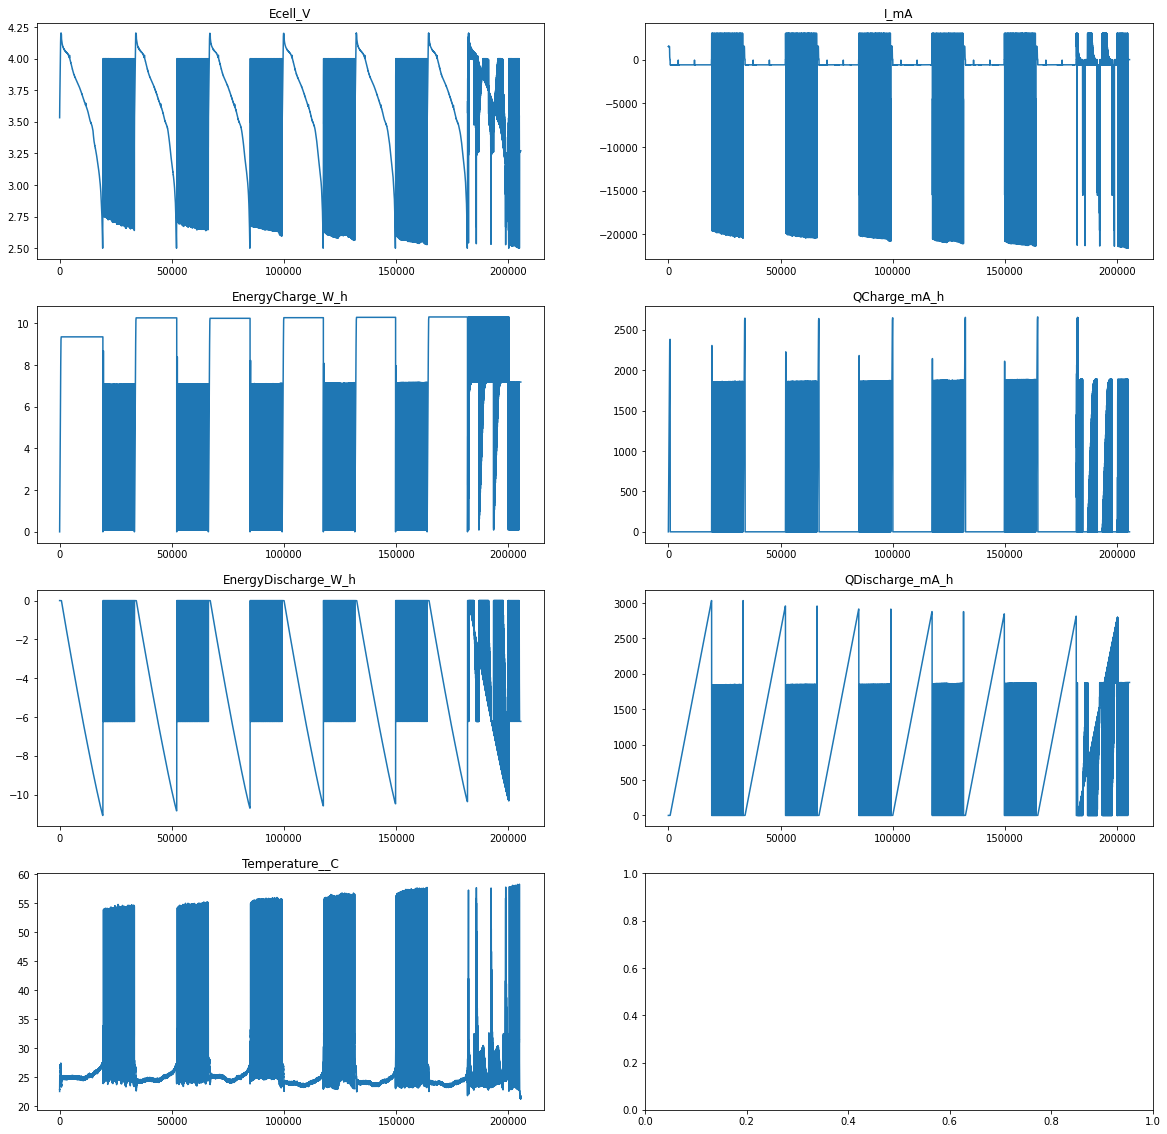

In [ ]:
#Plotting the dataset

x = range(1, len(df['I_mA'])+1)

figure, axis = plt.subplots(4,2)

axis[0,0].plot(x, df['Ecell_V'])
axis[0,0].set_title('Ecell_V')

axis[0,1].plot(x, df['I_mA'])
axis[0,1].set_title('I_mA')

axis[1,1].plot(x, df['QCharge_mA_h'])
axis[1,1].set_title('QCharge_mA_h')

axis[2,1].plot(x, df['QDischarge_mA_h'])
axis[2,1].set_title('QDischarge_mA_h')

axis[1,0].plot(x, df['EnergyCharge_W_h'])
axis[1,0].set_title('EnergyCharge_W_h')

axis[2,0].plot(x, df['EnergyDischarge_W_h'])
axis[2,0].set_title('EnergyDischarge_W_h')

axis[3,0].plot(x, df['Temperature__C'])
axis[3,0].set_title('Temperature__C')

plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [ ]:
#Dropping the time, Cycle Number and Ns columns

df.drop('time_s', inplace=True, axis=1)
df.drop('cycleNumber', inplace=True, axis=1)
df.drop('Ns', inplace=True, axis=1)

df

,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C
0,3.533041,1503.4052,0.000000,0.000000,0.0000,0.0000,22.539068
1,3.540132,1503.9963,0.014782,4.175503,0.0000,0.0000,22.546963
2,3.544544,1503.6022,0.029582,8.350963,0.0000,0.0000,22.925943
3,3.547577,1503.0110,0.044395,12.526452,0.0000,0.0000,22.831200
4,3.550019,1503.2079,0.059218,16.702000,0.0000,0.0000,22.981213
...,...,...,...,...,...,...,...
205482,3.270109,0.0000,7.183784,0.000000,-6.2245,1877.7213,21.228424
205483,3.270227,0.0000,7.183784,0.000000,-6.2245,1877.7213,21.544243
205484,3.270187,0.0000,7.183784,0.000000,-6.2245,1877.7213,21.378439
205485,3.270187,0.0000,7.183784,0.000000,-6.2245,1877.7213,21.560034


In [ ]:
#Scaling the inputs using mix_max_scaling

df_min_max_scaled = df.copy()

column = 'I_mA'
Imin = df_min_max_scaled[column].min()
Imax = df_min_max_scaled[column].max()
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

column = 'QCharge_mA_h'
QCmin = df_min_max_scaled[column].min()
QCmax = df_min_max_scaled[column].max()
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

column = 'QDischarge_mA_h'
QDmin = df_min_max_scaled[column].min()
QDmax = df_min_max_scaled[column].max()
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

column = 'EnergyCharge_W_h'
ECmin = df_min_max_scaled[column].min()
ECmax = df_min_max_scaled[column].max()
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

column = 'EnergyDischarge_W_h'
EDmin = df_min_max_scaled[column].min()
EDmax = df_min_max_scaled[column].max()
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

column = 'Temperature__C'
Tmin = df_min_max_scaled[column].min()
Tmax = df_min_max_scaled[column].max()
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

#Shuffling the scaled dataset

df_min_max_scaled = df_min_max_scaled.sample(frac = 1)
display(df_min_max_scaled)

,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C
86881,3.753235,0.999784,0.256255,0.273107,1.000000,0.000000,0.247761
78243,3.610483,0.853403,0.993688,0.000000,0.355811,0.604778,0.091045
169423,3.920606,0.853347,1.000000,0.000000,0.710603,0.261412,0.071855
129740,3.692455,0.701606,0.691936,0.000000,0.838738,0.162946,0.295736
94451,3.798929,0.331848,0.688920,0.000000,0.999997,0.000002,0.101279
...,...,...,...,...,...,...,...
201676,3.994031,0.877660,0.696519,0.710189,1.000000,0.000000,0.051386
157726,3.685798,0.701389,0.695179,0.000000,0.834793,0.167046,0.290192
89712,3.310878,0.877660,0.688677,0.000000,0.437287,0.610608,0.213006
165945,4.071078,0.853403,1.000000,0.000000,0.917792,0.073149,0.076546


#Model

In [ ]:
#Shuffling the input parameters

df_min_max_scaled = shuffle(df_min_max_scaled)

df_min_max_scaled.head()

,Ecell_V,I_mA,EnergyCharge_W_h,QCharge_mA_h,EnergyDischarge_W_h,QDischarge_mA_h,Temperature__C
68213,4.080453,0.853475,0.993688,0.000000,0.932043,0.060334,0.104904
6227,3.883185,0.853435,0.907392,0.000000,0.674772,0.294901,0.102772
26201,3.993400,0.877660,0.686359,0.698461,1.000000,0.000000,0.116844
92664,4.000451,0.933709,0.637193,0.651582,1.000000,0.000000,0.266311
19525,3.062480,0.160708,0.841244,0.000000,0.551445,0.462588,0.368230


In [ ]:
#defining the input and prediction mappings

fm = df_min_max_scaled.iloc[:, 1:]
tv = df_min_max_scaled.Ecell_V

print(fm)

            I_mA  EnergyCharge_W_h  QCharge_mA_h  EnergyDischarge_W_h  \
68213   0.853475          0.993688      0.000000             0.932043   
6227    0.853435          0.907392      0.000000             0.674772   
26201   0.877660          0.686359      0.698461             1.000000   
92664   0.933709          0.637193      0.651582             1.000000   
19525   0.160708          0.841244      0.000000             0.551445   
...          ...               ...           ...                  ...   
172123  0.853363          1.000000      0.000000             0.555239   
93293   0.877660          0.688617      0.701440             1.000000   
79190   0.853411          0.993688      0.000000             0.305074   
57608   0.918260          0.650762      0.664218             1.000000   
62409   0.883932          0.685625      0.698281             1.000000   

        QDischarge_mA_h  Temperature__C  
68213          0.060334        0.104904  
6227           0.294901        0.102772

In [ ]:
print(tv)

68213     4.080453
6227      3.883185
26201     3.993400
92664     4.000451
19525     3.062480
            ...   
172123    3.789475
93293     3.994543
79190     3.548207
57608     4.000451
62409     4.000412
Name: Ecell_V, Length: 205487, dtype: float64


In [ ]:
#Splitting the model into test and train split

from sklearn.model_selection import train_test_split

fm_train, fm_test, tv_train, tv_test = train_test_split(fm,tv, test_size = 0.1)

print(fm_train.shape)
print(fm_test.shape)
print(tv_train.shape)
print(tv_test.shape)

(184938, 6)
(20549, 6)
(184938,)
(20549,)


In [ ]:
#Defining the SVR model Parameters - ~4mins

model = SVR(C= 5, degree= 5, kernel= 'poly')
model.fit(fm_train, tv_train)

model.score(fm_test, tv_test)

0.9809463330763605

In [ ]:
#Exporting model as pickle file

filename = 'SVMmodel.sav'
#pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(fm_test, tv_test)
print(result)

0.9816300714180992


In [ ]:
#Getting model Prediction for user defined data input

I = -594.39056
EC = 9.350346456
QC = 0.000000
ED = -3.954224778
QD = 986.0277784
T = 24.891907

I = (I - Imin) / (Imax - Imin)

QC = (QC - QCmin) / (QCmax - QC)

QD = (QD - QDmin) / (QDmax - QDmin)

EC = (EC - ECmin) / (ECmax - ECmin)

ED = (ED - EDmin) / (EDmax - EDmin)

T = (T - Tmin) / (Tmax - Tmin)

pred = loaded_model.predict([[I, EC, QC, ED, QD, T]])

print("The cell voltage is Approx - ", *pred)

The cell voltage is Approx -  3.9542695149384057


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Testing model output on test split upto 4 decimals

predicted = list(model.predict(fm_test))
predicted = [round(num, 4) for num in predicted]

true = list(tv_test)
true = [round(num, 4) for num in true]

print(*predicted)
print(*true)

3.5679 3.5746 3.9294 4.1387 3.529 3.3452 2.6836 3.55 3.6672 3.9983 3.9614 3.4716 3.4041 4.0962 3.5779 4.0195 3.5423 3.3771 3.4061 3.8345 3.7415 3.6369 3.4942 3.9371 3.3882 4.007 3.8926 4.0464 3.8802 3.1835 3.8125 3.9343 3.7781 3.4218 2.9212 3.7076 3.9236 2.7194 3.3037 3.9977 3.1887 3.6024 3.4896 3.4689 3.7895 2.8175 3.8107 3.453 3.5712 3.9771 3.9558 3.5752 3.4867 2.9533 3.8721 3.1505 3.9336 3.8702 3.7698 3.7871 3.4683 4.1329 3.9282 3.3469 4.1019 3.4771 3.7133 3.9135 3.5158 3.913 3.2864 3.9977 3.5245 3.9266 3.625 4.0259 2.6058 3.4878 4.2411 3.3685 4.0992 3.0171 3.9975 3.9466 3.9598 3.5971 3.8527 3.8795 3.676 3.515 4.0976 3.6807 3.3666 3.7421 4.1141 4.019 3.5121 3.9033 4.1092 4.14 3.954 3.9634 4.0796 3.841 3.7041 3.5024 3.781 3.2724 3.9715 3.4937 3.7739 3.8978 3.5822 3.3784 3.9874 3.5078 3.9244 4.0007 3.5521 3.5732 3.9274 3.4911 4.1225 3.7428 4.0786 3.6889 3.9018 3.8061 3.2729 4.092 3.587 4.0803 3.3193 3.6553 3.4203 4.0346 4.1039 3.6496 4.0257 2.7805 3.9128 3.689 4.0481 3.7708 3.9469 3.3